In [1]:
import os
import pandas as pd
from scipy.fft import fft, rfft, fftfreq
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.signal import savgol_filter, butter, lfilter, hilbert, freqz
from scipy import signal


C6_1
254
_______________
C6_10
222
_______________
C6_11
258
_______________
C6_12
234
_______________
C6_13
201
_______________
C6_14
240
_______________
C6_15
225
_______________
C6_16
231
_______________
C6_17
204
_______________
C6_18
225
_______________
C6_19
207
_______________
C6_2
282
_______________
C6_20
204
_______________
C6_21
201
_______________
C6_22
198
_______________
C6_23
192
_______________
C6_24
186
_______________
C6_25
183
_______________
C6_26
255
_______________
C6_27
216
_______________
C6_28
228
_______________
C6_29
204
_______________
C6_3
225
_______________
C6_30
219
_______________
C6_31
267
_______________
C6_32
264
_______________
C6_33
225
_______________
C6_34
240
_______________
C6_35
213
_______________
C6_36
252
_______________
C6_37
243
_______________
C6_38
225
_______________
C6_39
225
_______________
C6_4
258
_______________
C6_40
306
_______________
C6_41
246
_______________
C6_42
252
_______________
C6_43
210
_______________
C6_44
198
______

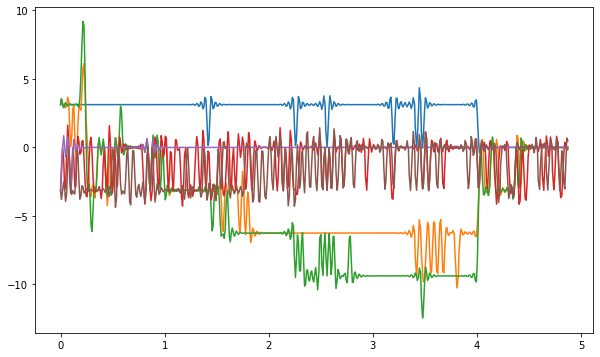

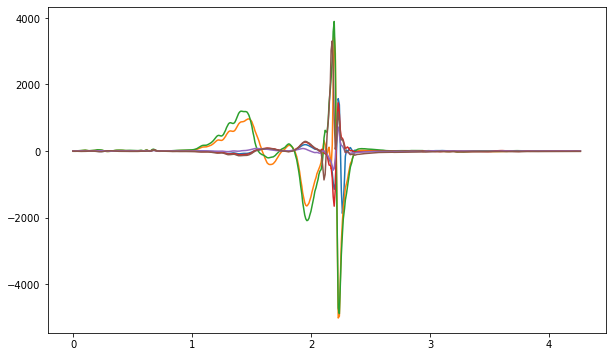

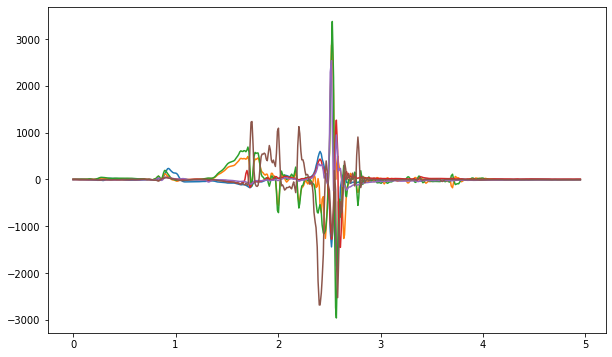

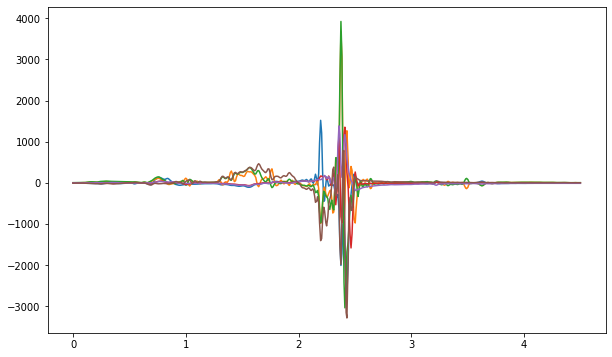

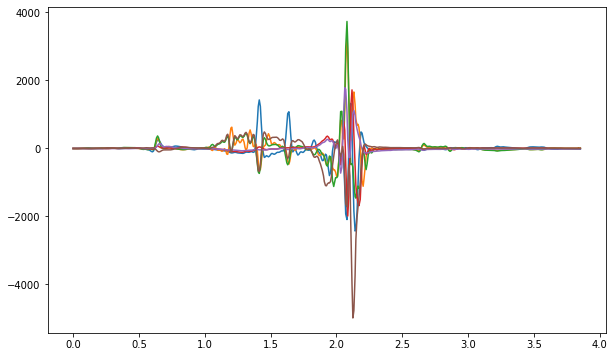

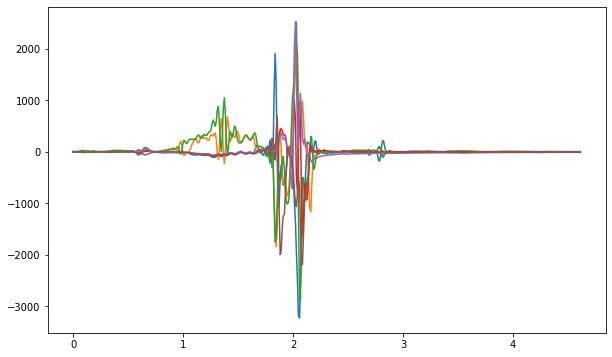

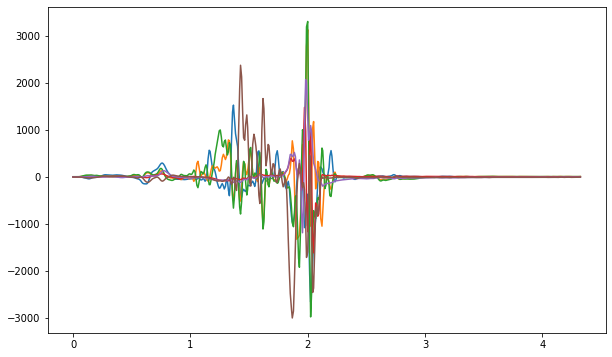

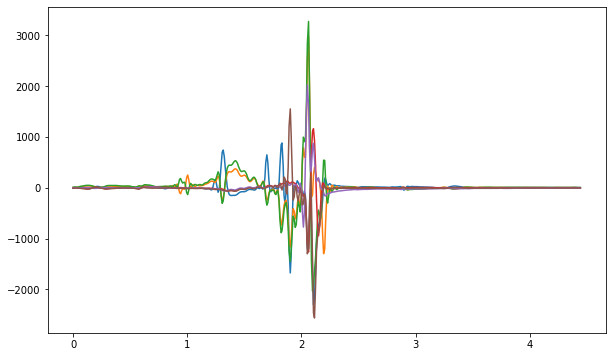

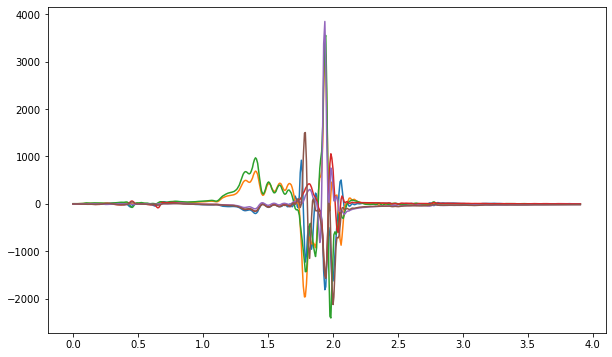

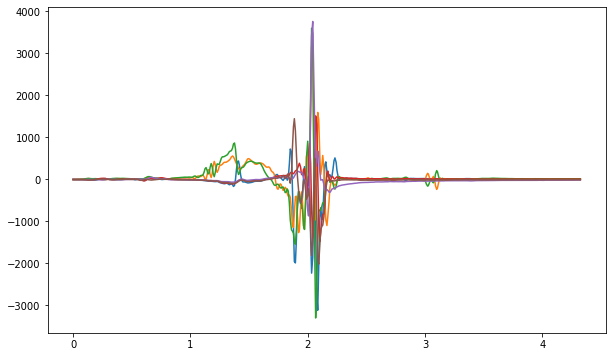

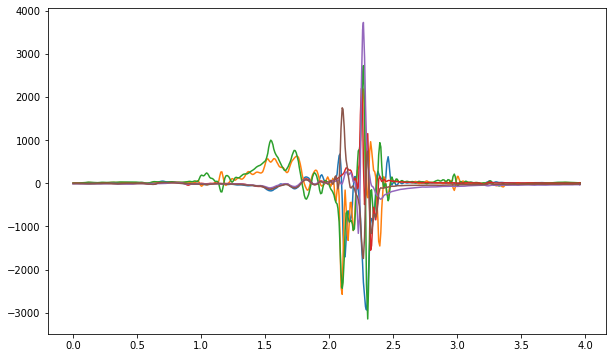

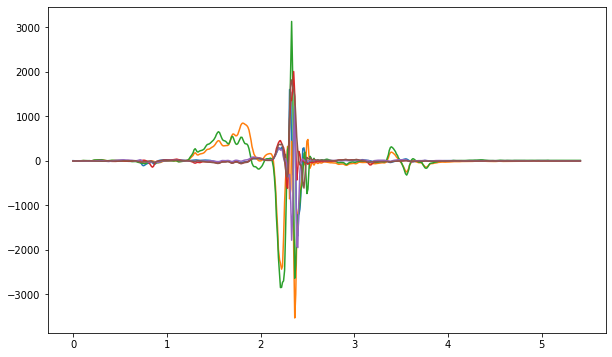

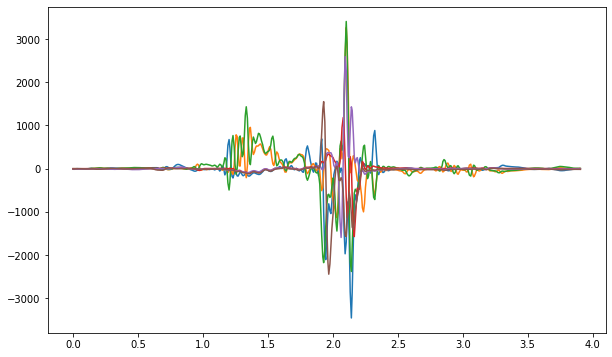

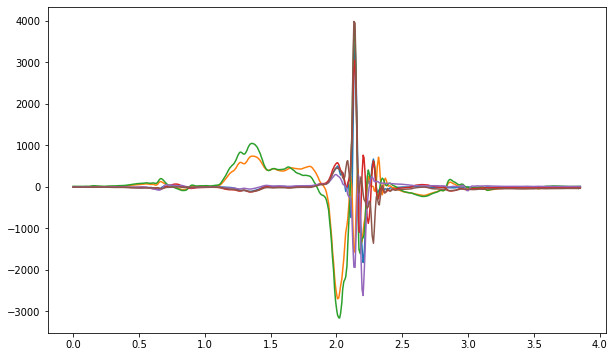

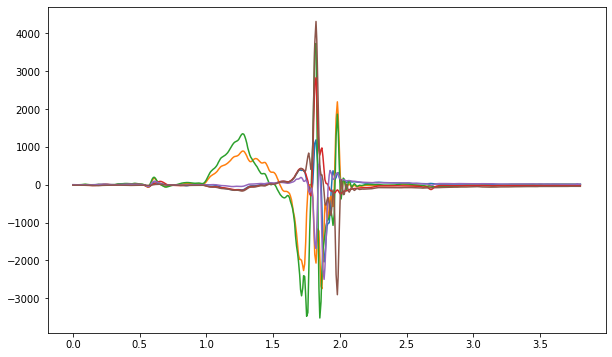

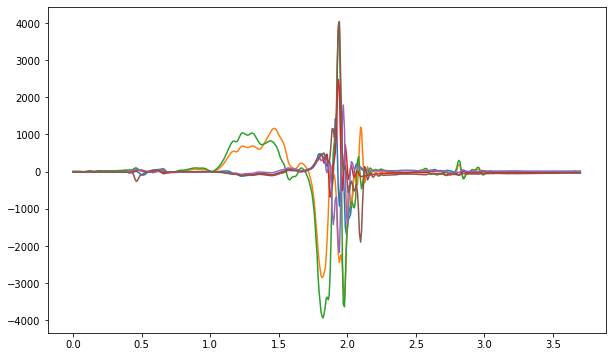

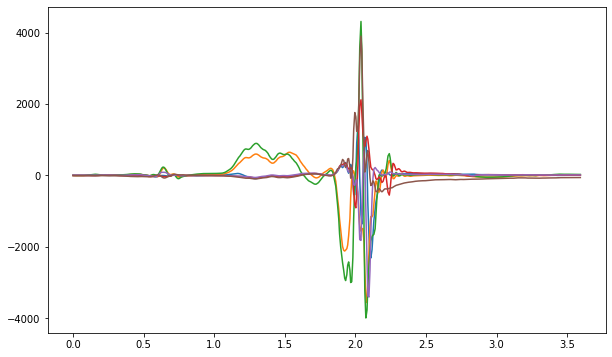

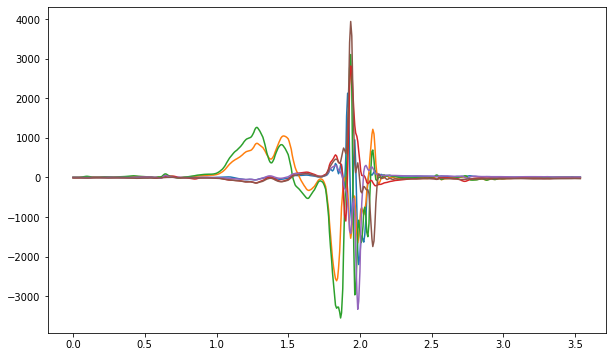

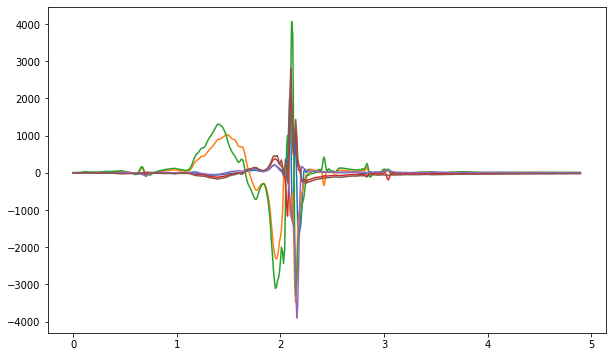

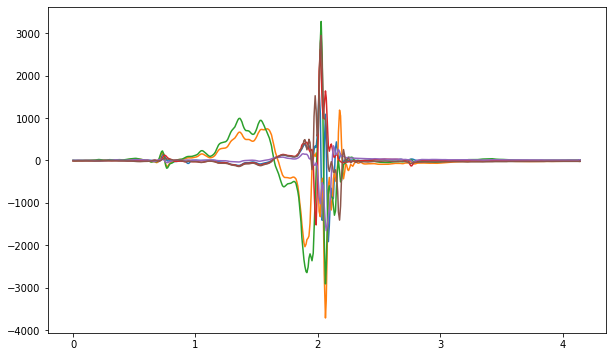

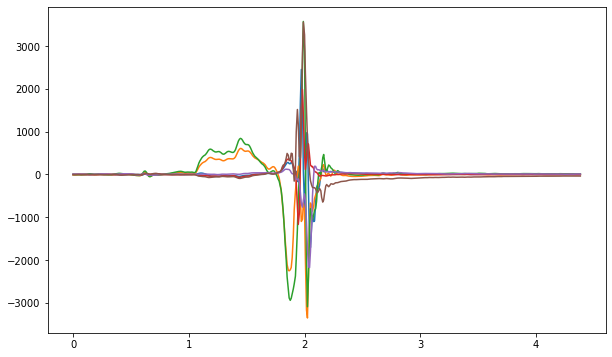

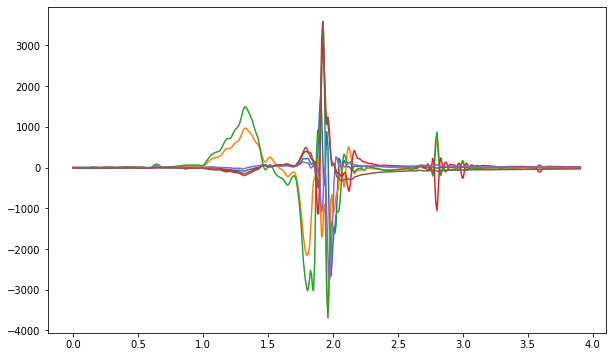

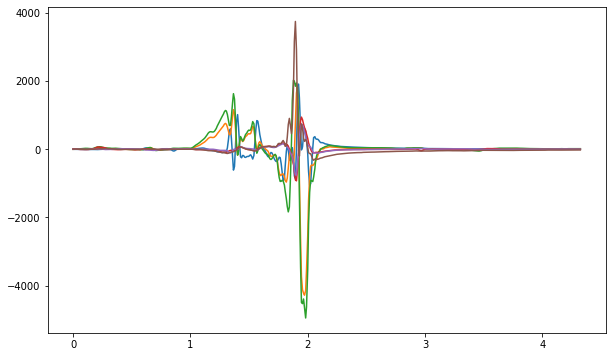

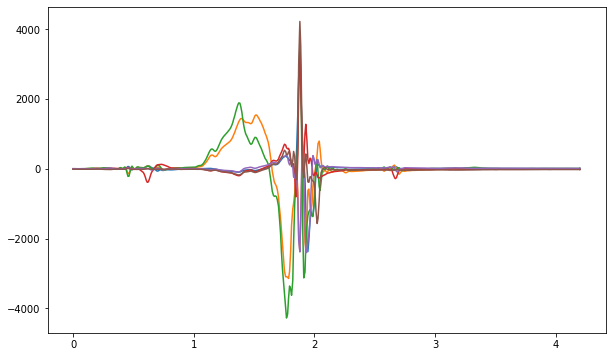

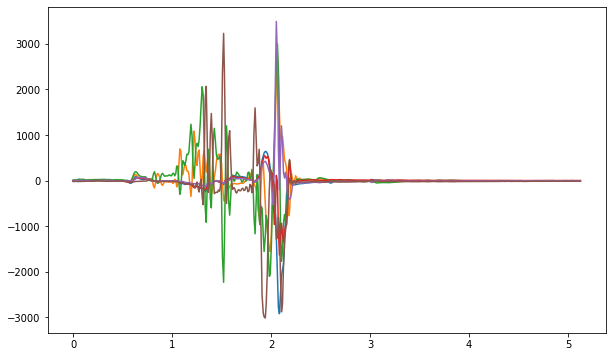

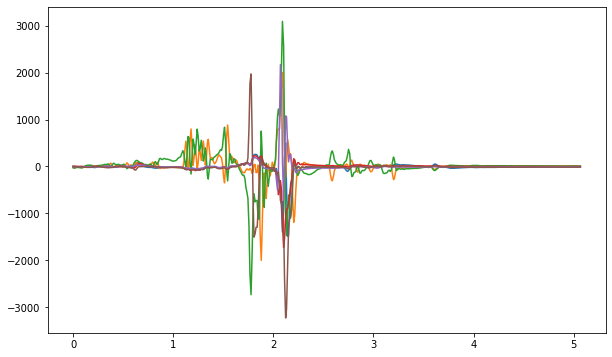

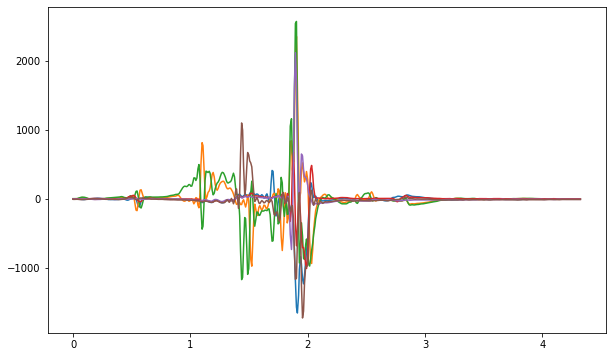

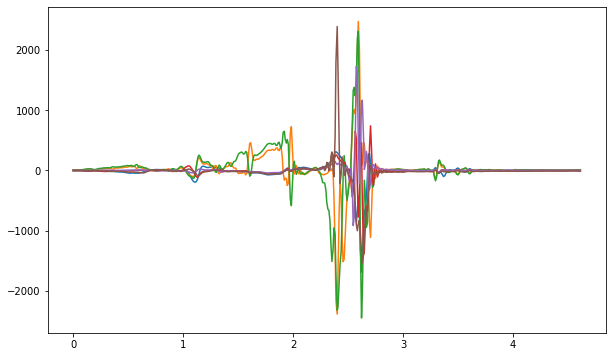

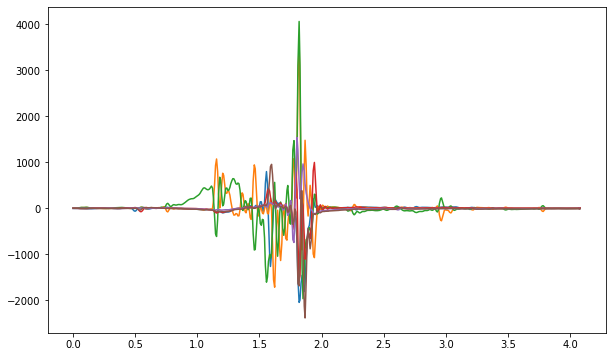

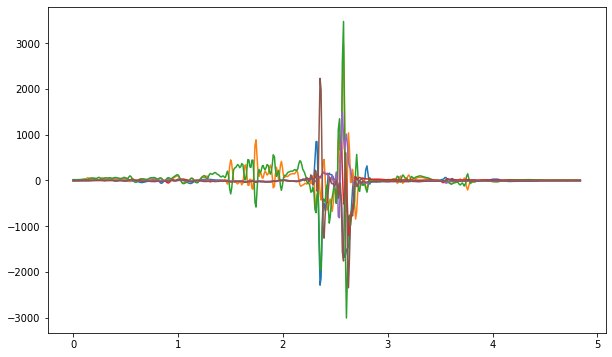

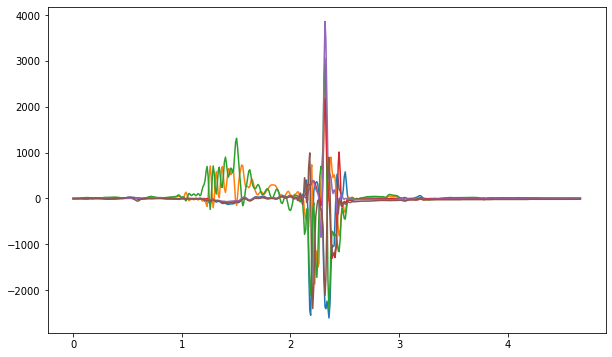

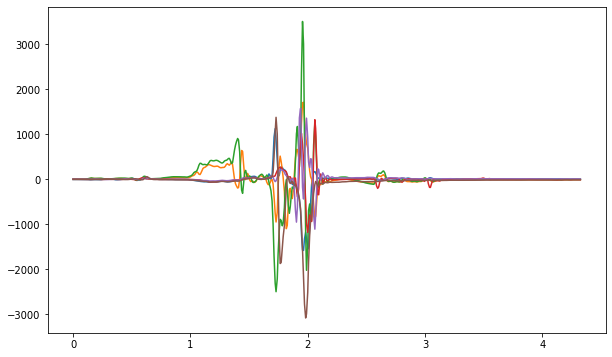

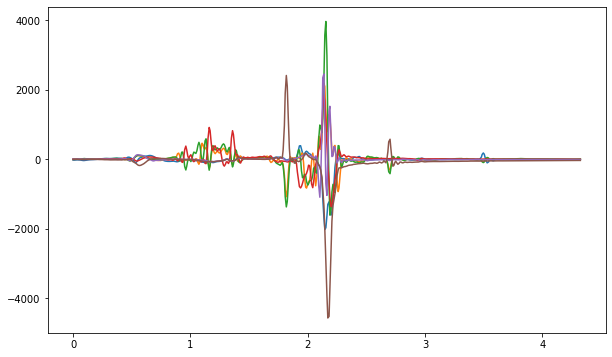

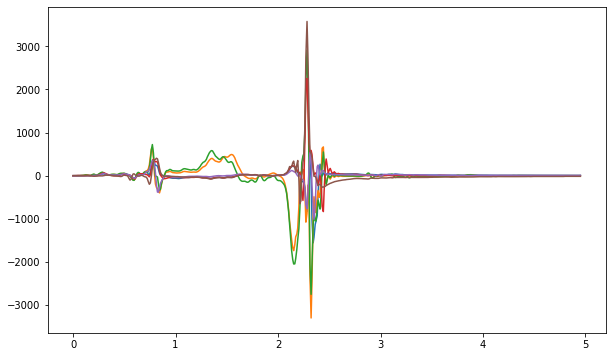

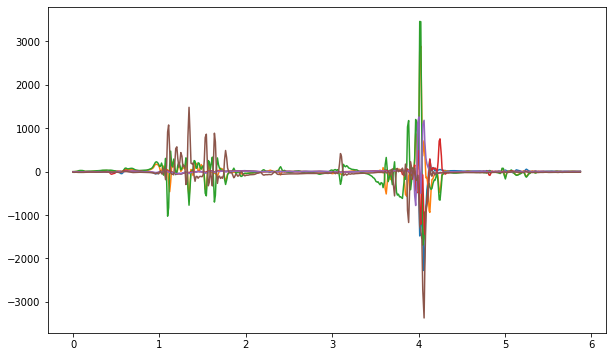

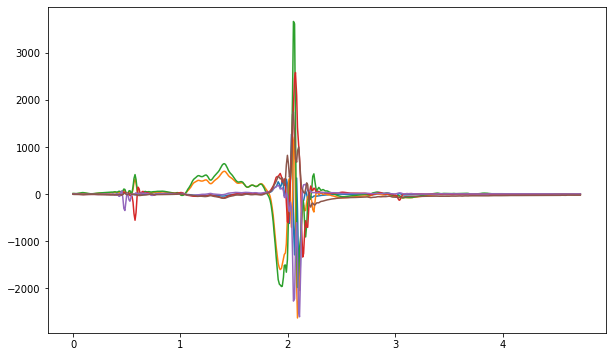

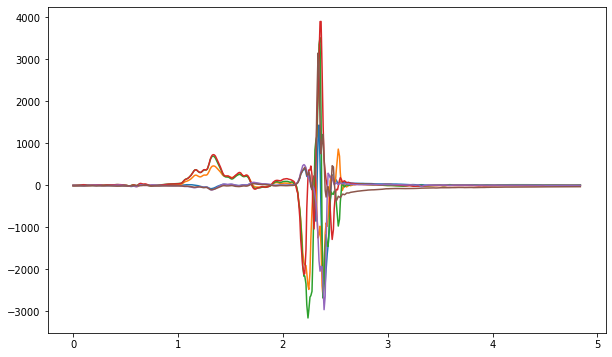

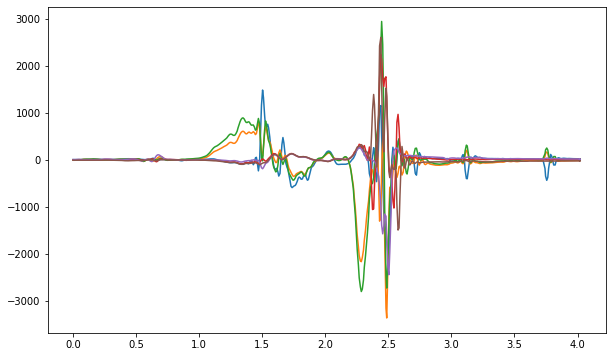

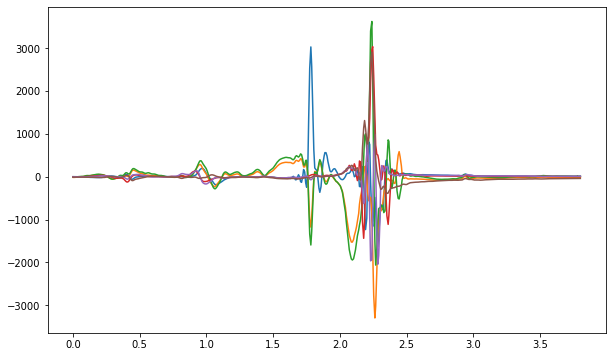

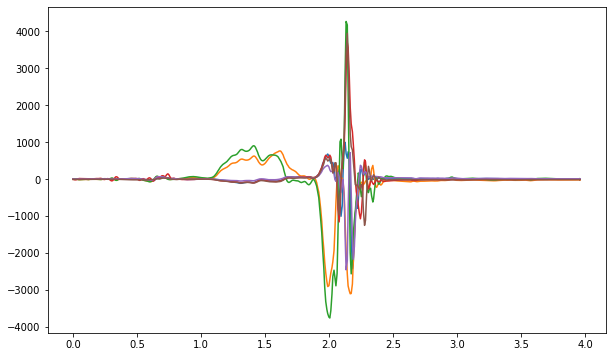

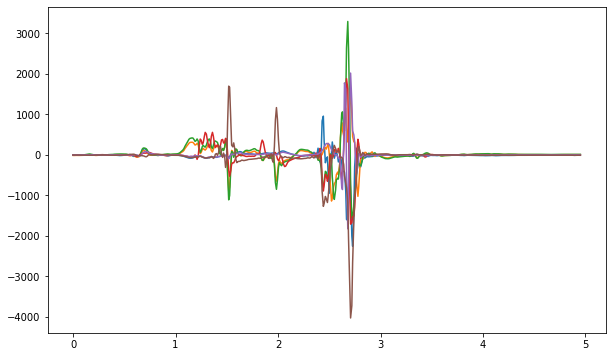

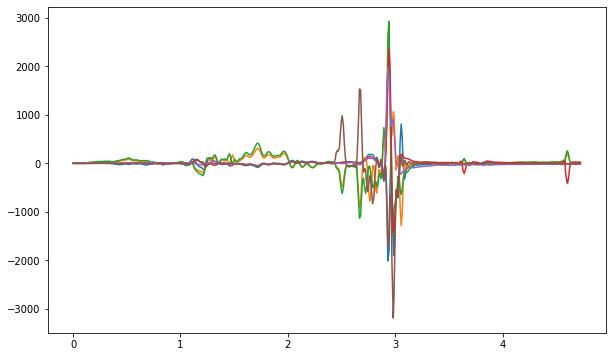

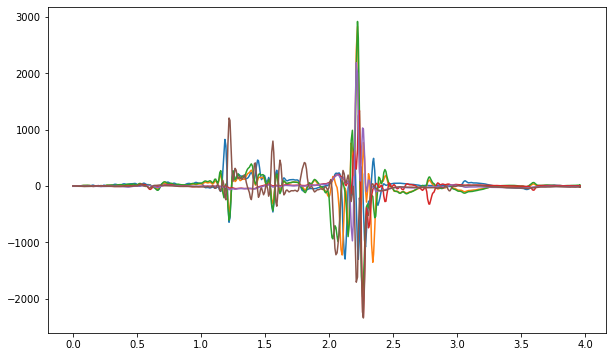

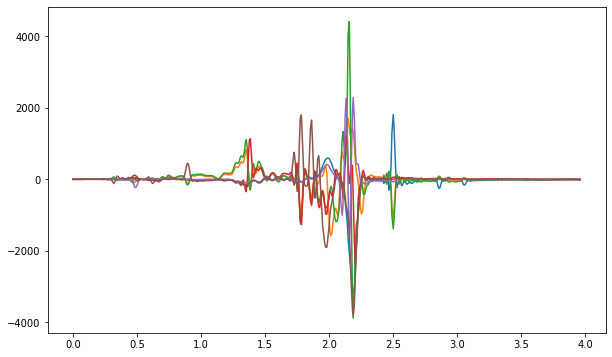

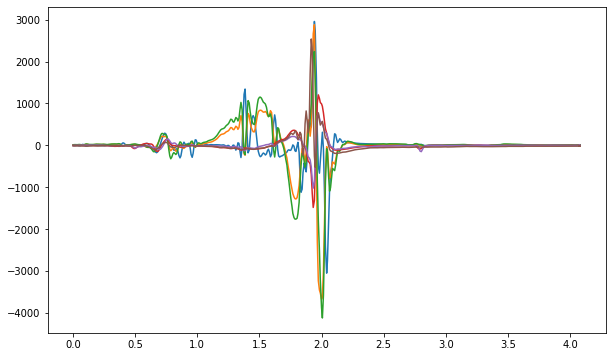

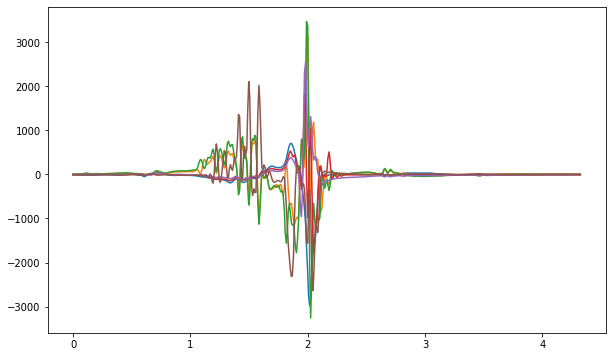

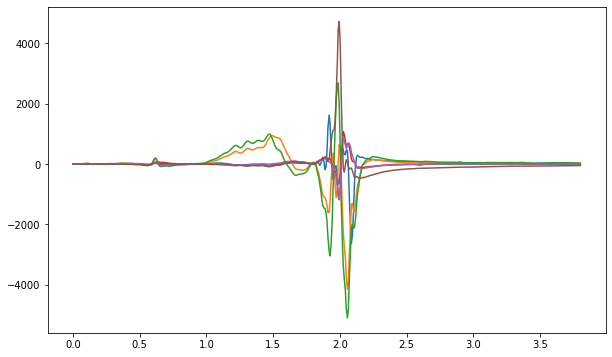

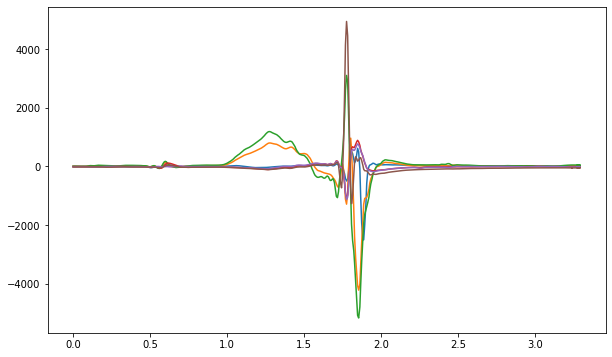

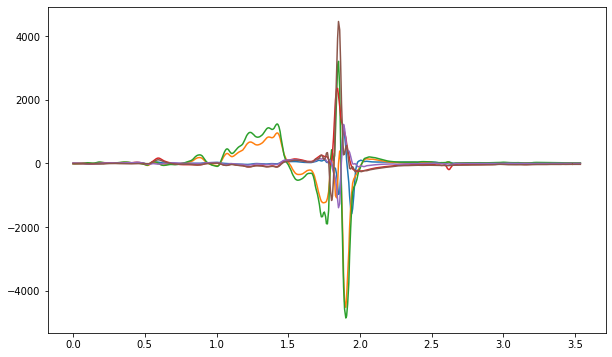

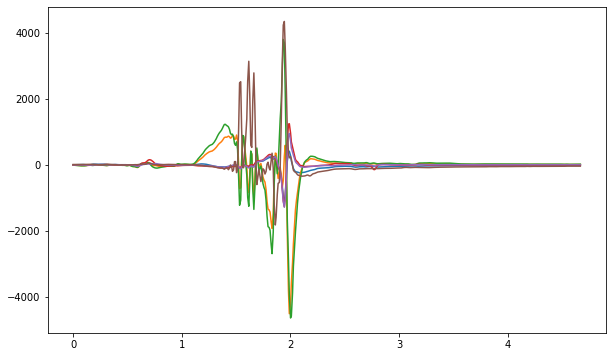

In [43]:
Data = {
    'Time':[],
    'Channel1':[],
    'Channel2':[],
    'Channel3':[],
    'Channel4':[],
    'Channel5':[],
    'Channel6':[],
}
dataset = 'G:/Workspace/Work/TENG-Signal-Classification/dataset/raw data/C6'
cases = os.listdir(dataset)
cases

Index = ['Time', 'Channel1', 'Channel2', 'Channel3', 'Channel4', 'Channel5', 'Channel6']

for case in cases:
    file_path = dataset + '/' + case
    file_name = dataset.split('/')[-1] + '_' + case.split('.')[0]
    data = pd.read_csv(file_path, header = 0, usecols = Index, squeeze = True)
    print(file_name)
    print(len(data['Time']))
    print('_______________')
    
    Time = data['Time'].tolist()
    C1 = data['Channel1'].tolist()
    C2 = data['Channel2'].tolist()
    C3 = data['Channel3'].tolist()
    C4 = data['Channel4'].tolist()
    C5 = data['Channel5'].tolist()
    C6 = data['Channel6'].tolist()
    
    #   下采样点数
    N = 520
    q = int(len(Time) / N) # downsample rate
        
    Data['Time'] = signal.resample_poly(Time, N, len(Time))[:500]
    Data['Channel1'] = signal.resample_poly(C1, N, len(Time))[:500]
    Data['Channel2'] = signal.resample_poly(C2, N, len(Time))[:500]
    Data['Channel3'] = signal.resample_poly(C3, N, len(Time))[:500]
    Data['Channel4'] = signal.resample_poly(C4, N, len(Time))[:500]
    Data['Channel5'] = signal.resample_poly(C5, N, len(Time))[:500]
    Data['Channel6'] = signal.resample_poly(C6, N, len(Time))[:500]
    
    plt.figure(figsize=(10, 6))
    plt.plot(Data['Time'],Data['Channel1'], 
             Data['Time'],Data['Channel2'],
             Data['Time'],Data['Channel3'],
             Data['Time'],Data['Channel4'],
             Data['Time'],Data['Channel5'],
             Data['Time'],Data['Channel6'])
    save_path = 'G:/Workspace/Work/TENG-Signal-Classification/dataset/preprocessed'
    os.makedirs(save_path + '/' + file_name)
    plt.savefig(save_path + '/' + file_name + '/' + 'Signal' + '.jpg' )
    plt.show()
    savedata = pd.DataFrame(data=Data)
    savedata.to_csv(save_path + '/' + file_name + '/' + file_name + '.csv')
